In [2]:
import numpy as np
import numpy.fft as fft
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

25362.5068397
25362.5068397


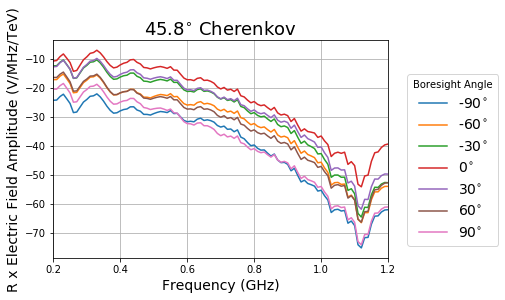

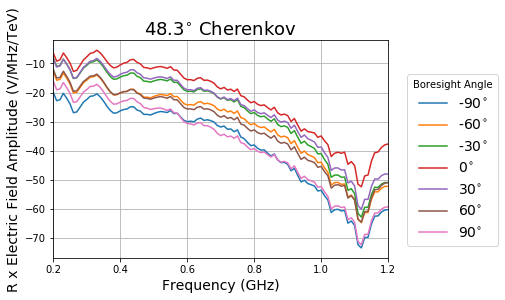

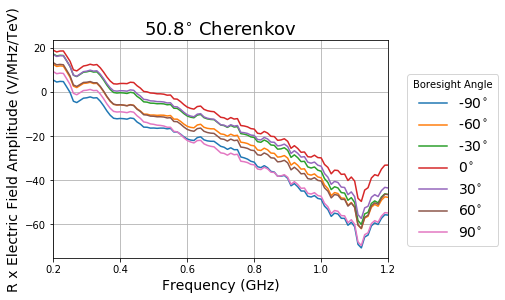

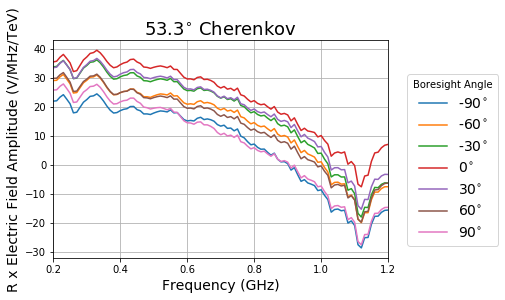

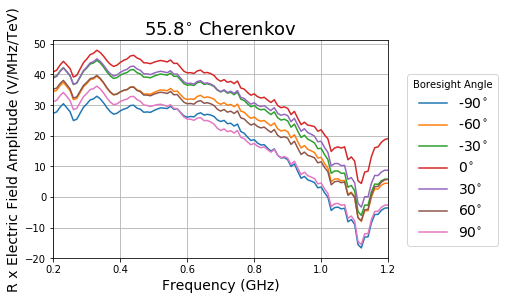

In [3]:
names=['/home/donald/shower_45.8_9.dat','/home/donald/shower_48.3_9.dat','/home/donald/shower_50.8_9.dat','/home/donald/shower_53.3_9.dat','/home/donald/shower_55.8_9.dat']
title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

for i in range(len(names)):
    A=np.loadtxt(names[i])

    x=A[:,0]
    x=np.concatenate((x[9999:19997],(x[0:9999]+1000)))
    
    #for i in range(len(x)):
     #   x[i]*=10**3
    y=A[:,1]
    y=np.concatenate((y[9999:19997],(y[0:9999])))

    #plt.plot(x,y)
    #plt.xlim(900)

    N=len(x)
    dt=x[1]-x[0]
    
    #dt=0.04
    #dt=0.00
    NFFT=100*N
    f = fft.fft(y, N)
    fshift = fft.fftshift(f)
#pyp.plot(abs(f*f))



    freq = fft.fftfreq(N, dt)
    df=freq[1]-freq[0]
    

    

    
    
    plt.figure(i)
    plt.title(title[i]+' Cherenkov',fontsize=18)
    g = interp1d(fft.fftshift(freq)*3, 10*np.log10(10**(-4)*1000*abs(fshift)*dt*1e3/(N)))
    fnew=np.linspace(.200,1.200,101)
    
    
    angles=['/home/donald/minus90.txt','minus60.txt','minus30.txt','zero.txt','plus30.txt','plus60.txt','plus90.txt',]
    name=['-90$^{\circ}$', '-60$^{\circ}$', '-30$^{\circ}$', '0$^{\circ}$', '30$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$']


    fnew=np.linspace(.200,1.200,101)



    for j in range(len(angles)):
        
        title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

    
        A=np.loadtxt(angles[j],delimiter=',',unpack=True)
    
       
        

    
        plt.plot(fnew,A+g(fnew),label=name[j])
        plt.legend(loc='best')
        plt.grid(True)
        #plt.ylim(0,80) 
        plt.xlim(0.2,1.2)
        
        #plt.title('Total Transfer Function', fontsize=18)
        plt.ylabel('Gain (dB)', fontsize=16)
        plt.xlabel('Frequency (GHz)', fontsize=16)
        plt.legend(loc='right',bbox_to_anchor=(1.35,0.45),title='Boresight Angle',fontsize=14)
    
    
    

    
    
    
  
    plt.xlim(.2,1.2)
    #plt.ylim(-120,-20)
    plt.xlabel('Frequency (GHz)',fontsize=14)
    plt.ylabel('R x Electric Field Amplitude (V/MHz/TeV)',fontsize=14)
   
    #plt.title('1 EeV',fontsize=16)
    plt.grid(True, which='both')
    
parseval_sx = np.sum(10**3*y**2*dt*1e3)
print(parseval_sx)

parseval_fx = np.sum(1000*abs(fshift**2)*dt*1e3/(N))
print(parseval_fx)